In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
important_cols = ['respondent_id', 'agency_abbr', 'loan_type_name', 'property_type_name',
       'loan_purpose_name', 'owner_occupancy_name', 'loan_amount_000s',
       'preapproval_name', 'action_taken_name', 'msamd_name', 'state_abbr',
       'county_name', 'census_tract_number', 'applicant_ethnicity_name',
       'co_applicant_ethnicity_name', 'applicant_race_name_1',
       'applicant_race_name_2', 'applicant_race_name_3',
       'applicant_race_name_4', 'applicant_race_name_5',
       'co_applicant_race_name_1', 'co_applicant_race_name_2',
       'co_applicant_race_name_3', 'co_applicant_race_name_4',
       'co_applicant_race_name_5', 'applicant_sex_name',
       'co_applicant_sex_name', 'applicant_income_000s', 'purchaser_type_name',
       'denial_reason_name_1', 'denial_reason_name_2', 'denial_reason_name_3',
       'rate_spread', 'hoepa_status_name', 'lien_status_name', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units']
df_2017 = pd.read_csv('data/hmda_2017_nationwide_all-records_labels.csv',usecols = important_cols)
df_2017['denied'] = df_2017[['denial_reason_name_1']].applymap(lambda x : 1 if x==x else 0)
df_2017.head()

C:\Users\maxym\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,respondent_id,agency_abbr,loan_type_name,property_type_name,loan_purpose_name,owner_occupancy_name,loan_amount_000s,preapproval_name,action_taken_name,msamd_name,...,rate_spread,hoepa_status_name,lien_status_name,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,denied
0,75-2921540,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,53.0,Not applicable,Application withdrawn by applicant,Philadelphia - PA,...,NaN,Not a HOEPA loan,Secured by a first lien,3202.0,97.279999,57400.0,47.540001,710.0,1314.0,0
1,0000504713,CFPB,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,168.0,Not applicable,Application denied by financial institution,"Spokane, Spokane Valley - WA",...,NaN,Not a HOEPA loan,Secured by a first lien,3733.0,4.580000,63900.0,86.239998,861.0,1241.0,1
2,7810600004,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,103.0,Not applicable,File closed for incompleteness,Salt Lake City - UT,...,NaN,Not a HOEPA loan,Secured by a first lien,5498.0,37.919998,75400.0,63.939999,1270.0,1658.0,0
3,42-1739728,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Not owner-occupied as a principal dwelling,88.0,Not applicable,Loan originated,Springfield - MO,...,NaN,Not a HOEPA loan,Secured by a first lien,3566.0,11.830000,55200.0,74.290001,573.0,1261.0,0
4,42-1739728,HUD,Conventional,One-to-four family dwelling (other than manufa...,Refinancing,Owner-occupied as a principal dwelling,90.0,Not applicable,Application withdrawn by applicant,"Chicago, Naperville, Arlington Heights - IL",...,NaN,Not a HOEPA loan,Secured by a first lien,2910.0,48.660000,77500.0,79.250000,599.0,26.0,0


DSC167 Paper 1 - Lending Bias

Maxwell Levitt and Emily Ramond

May 05, 2022

## Bias in Lending: The Effects of Loan Denial Rates Differing by Race and Ethnicity

### Introduction

Lending decision models are a common practice in financial institutions in recent years, and have raised concerns about not only the accuracy of these models but also the inherent bias present in these models. More specifically, there is significant concern regarding how there is disparity in these decision models based on someone’s race or ethnicity. The Home Mortgage Disclosure Act established in 1975 requires that financial institutions report such data used in these decision making processes to the public to help in policy decision processes, display housing needs in communities, and show any potential discriminatory practices that can then be addressed (CFPB).  Our analysis covers the year 2017 specifically, but can be extended to include more updated data and information as well. 

In order to conclude if race is influencing the denial rate, rather than financial history and background, we plan to create a model that considers all economic factors and then analyze if the denial rate is still discriminatory based on race. We also bring awareness to a cycle of unfairness - being, those born are at a disadvantage from the start, and suffer from a cycle of poverty that they are generationally unable to escape, and our models uphold this cycle. Although illegal because of antidiscrimination laws, we hypothesize that there will be substantial evidence of discriminatory results in whether someone is awarded or denied a loan by a financial institution based on their race and ethnicity due to the fact that “mortgage lenders have clearly discriminated against some groups of borrowers” in the past (Minnell, p.45). 

### Historical Context

Historically, marginalized populations have experienced much higher loan denial rates than White americans. This has been a result of many forms of discrimination that have been legal and illegal. Initially, this discrimination was allowed by law and was highly prevalent. Even though many forms of discrimination have been outlawed, discriminatory practices remain and many of these are based on prior decisions that are a result of prior discriminatory practices. 

One clear difference in loan denial rates happened as a result of redlining. This was the practice of marking it much less likely to extend credit to individuals in areas that were of lower income and wealth and normally were historically marginalized population filled locations. This was done as a way of systematically avoiding giving loans to marginalized populations and low income individuals because it was believed that these individuals were of higher credit risk. This was an example of statistical discrimination because it was meant to avoid giving higher risk loans but it was based on the fact that most people from the areas were of lower income so were more likely to be credit risks. It was also taste based descrimination since many historically marginalized individuals in general were less likely to be given credit since the majority of creditors at the time were White individuals and were unlikely to relate to historically marginalized populations. This practice continued until the “the Community Reinvestment Act of 1977 addresses this concern by imposing an affirmative action on lenders to help meet the credit needs of the bank’s entire community, including low and moderate-income neighborhoods, as consistent with safe and sound operation of the bank” (Ladd 56). It was not until 1977 that this issue was addressed and it took over a decade to fully remove this systematic process from the credit system. This was just one specific example of allowed discrimination in the loan approval process.

Redlining and other past discrimination built the groundwork for all the discrimination in the credit industry that still remains present today.This discrimination that still persists can be debated as to whether it is just when it is purely a result of statistical discrimination. From the perspective of Formal Equality of Opportunity, this practice of discrimination that is still around could be considered to be just because the discrimination is based on historical information that historically marginalized populations are more likely to default on loans. These marginalized populations can still get loans if they work hard to build up wealth before applying and it is just from this perspective that building up the necessary wealth may be more difficult than it is for White individuals on average. Based on Fair Equality of Opportunity it would not be fair to use statistical discrimination based on race because the reality is it is more difficult for marginalized populations to establish their wealth than White people on average. This is a result of the cycle of poverty that has happened as a result of practices such as redlining. Clear discrimination has had long lasting effects since it has been difficult for historically marginalized populations to gain wealth as a result of starting off with much less than the average White American. As a result of this difference in average starting point, based on fair equality of opportunity, it is just for the historically marginalized population to be judged with lower standards because they have to work harder to reach the same levels of success as White Americans. The nature of the current discrimination would also be found to be unjust based on Luck Egalitarianism. This is because in Luck Egalitarianism it is believed that everyone should have an even starting point. To make it even and just from this perspective marginalized populations should again be judged with lower standards for credit. Overall, the current discrimination can be considered just or unjust based on one’s Distributive Justice principle, but it is clear that the discrimination present can be considered unjust. 

As mentioned before, redlining and other now illegal discriminatory practices were examples of disperate treatment. These practices may now be illegal and not occur, but they have left behind many factors of disparate impact that still persist. Marginalized populations used to be intentionally discriminated against which follows the idea of disparate treatment but this is now illegal. The issue is that these have led to a negative cycle where this population starts off with less than White Americans and are less likely to receive the assistance of credit as result. Receiving less credit is a disparate impact of historically receiving less credit and other forms of discrimination in the past. The discrimination in the credit industry used to be a result of disperate treatment, but now with the new laws in place it is a result of disperate impact.


### Data

For our project, we extracted HDMA data from the Consumer Financial Protection Bureau website on all records from 2017. In the future of our project, we may expand to include previous years, however, this data itself includes over 14 million observations and requires a lot of time to run and process, so including a range of data will be completed towards the end of the project, if decided. 

Our focus is on loan denial rates based on race and ethnicity, so we did some feature engineering to drop useless columns and create a binary column on a loan being denied/accepted. Additionally, there are several race columns, but the 2nd through 5th listing had a majority of null values, so we assume the first entry as the race of the individual. Since we are focusing on race, it's important to note that the distribution in the data contains 64.9% White applicants, 11.5% Not provided, 10.6% Not applicable, and 13% part of a historically marginalized group. This distribution is poor, and raises other questions with the data collection that is useful for the project. However, it is still a good source for our project since it is a such a large scale data source.

Native Hawaiian or Other Pacific Islander                                            0.004132
American Indian or Alaska Native                                                     0.007671
Asian                                                                                0.048445
Black or African American                                                            0.070180
Not applicable                                                                       0.105969
Information not provided by applicant in mail, Internet, or telephone application    0.114873
White                                                                                0.648730
Name: applicant_race_name_1, dtype: float64


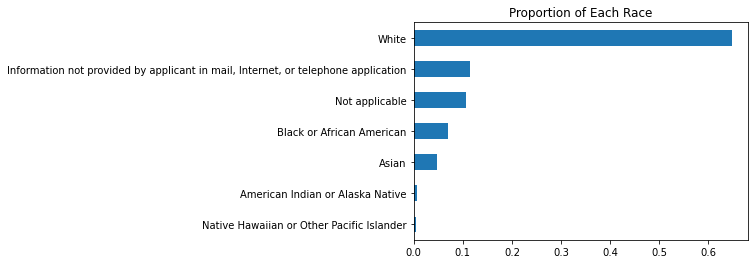

In [13]:
# Plot Proportion of each Race
prop_race = (df_2017['applicant_race_name_1'].value_counts() / df_2017.shape[0]).sort_values()
print(prop_race)
prop_race.plot(kind = 'barh',title = 'Proportion of Each Race')

We are also focusing on loan denial based on Ethnicity, so we did some exploration into the distribution of this feature. For Ethnicity we also had an uneven distribution, similar to race, with 69.1% not Hispanic, 10.8% no information provided, 10.6% not applicable, and 9.4% Hispanic. With this distribution, we are questioning whether to consider ethnicity, since a lot more information is not included than the amount of Hispanic individuals in the data which could skew the results. We also had less difference between the denial rate for Hispanic and not Hispanic compared to the differences found in race as a result of historically marginalized groups also being present in the not Hispanic group. Overall, we will likely focus our study mainly on Race but we will also consider ethnicity as another attribute since we will be able to run similar code for analysis based on race and ethnicity.

Hispanic or Latino                                                                   0.094033
Not applicable                                                                       0.106434
Information not provided by applicant in mail, Internet, or telephone application    0.108066
Not Hispanic or Latino                                                               0.691468
Name: applicant_ethnicity_name, dtype: float64


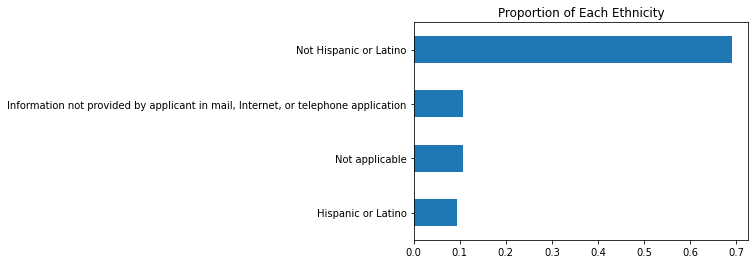

In [14]:
# Plot Proportion of each Ethnicity
prop_ethnicity = (df_2017['applicant_ethnicity_name'].value_counts() / df_2017.shape[0]).sort_values()
print(prop_ethnicity)
prop_ethnicity.plot(kind = 'barh',title = 'Proportion of Each Ethnicity')

One more thing we looked into was the prevalence of different types of loans in our data. We found that most loans in our data were Conventional with 69.7% and a good portion were FHA-insured with 18.6% and VA-guaranteed with 9.8%, but only 1.9% of the data is FSA/RHS-guaranteed. As a result of this distribution, we are planning on focusing our analysis on Conventional loans to avoid confounding factors, but may also apply the analysis we do to FHA-insured and VA-guaranteed loans to see if our findings translate to different types of loans.

loan_type_name
FSA/RHS-guaranteed    0.019134
VA-guaranteed         0.098191
FHA-insured           0.186141
Conventional          0.696535
dtype: float64


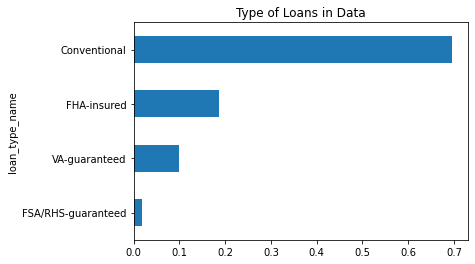

In [19]:
# Plot proportion of each type of loan in data
loan_prop = (df_2017.groupby('loan_type_name').size() / df_2017.shape[0]).sort_values()
print(loan_prop)
loan_prop.plot(kind = 'barh',title = 'Type of Loans in Data')

It is important to note that we are showing the disparate impact, where the intent of this specific action is not to discriminate against a protected characteristic (race and ethnicity, in this case). However, in mortgage lending and loan approval applications, this is still illegal. Additionally, we recognize that the training data may fail to capture the social structure appropriately, and we encourage you to check out the context section to read more about the background of this issue. 

### Measures of Fairness
We focused on analyzing whether our model was fair in terms of loan denial rates based on race and ethnicity. The first measure of fairness we took into account was demographic parity. Our data is not fair based on demographic parity because the denial rate is significantly different across different races. We calculated this with our data by finding the average denial rate among different races and ethnicities. When grouping based on race we found a clear difference between the average denial rate for White individuals of 9.6% and the average denial rate of 17.4% for Black individuals. When grouping based on ethnicity, we found a much smaller discrepancy with Non-Hispanic individuals having an average denial rate of 10.2% while Hispanic individuals had an average denial rate of 12.8%.


applicant_race_name_1
Not applicable                                                                       0.003417
Asian                                                                                0.095501
White                                                                                0.095850
Native Hawaiian or Other Pacific Islander                                            0.138784
Information not provided by applicant in mail, Internet, or telephone application    0.153795
American Indian or Alaska Native                                                     0.158092
Black or African American                                                            0.174084
Name: denied, dtype: float64


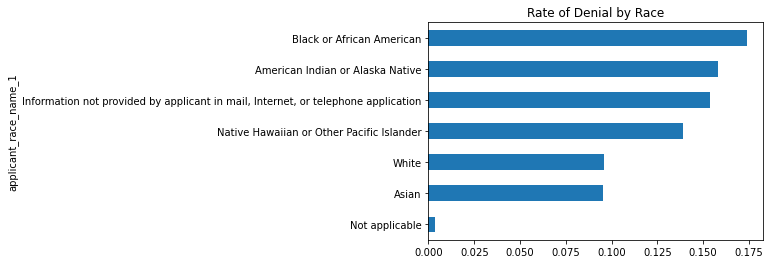

In [15]:
# Plot mean denial by race
mean_denial_by_race = df_2017.groupby(['applicant_race_name_1']).mean()['denied'].sort_values()
print(mean_denial_by_race)
mean_denial_by_race.plot(kind='barh', title='Rate of Denial by Race')

applicant_ethnicity_name
Not applicable                                                                       0.003765
Not Hispanic or Latino                                                               0.101742
Hispanic or Latino                                                                   0.127995
Information not provided by applicant in mail, Internet, or telephone application    0.148538
Name: denied, dtype: float64


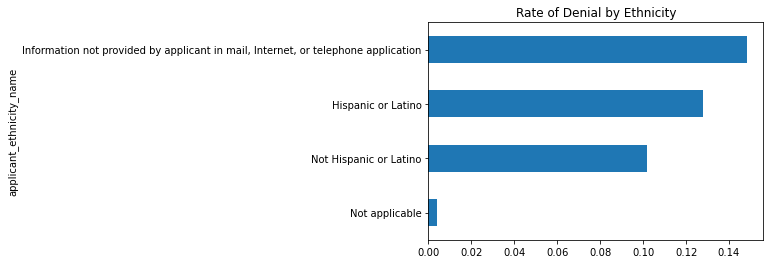

In [16]:
# Plot mean denial by ethnicicity
denial_rate_by_ethnicity = df_2017.groupby(['applicant_ethnicity_name']).mean()['denied'].sort_values()
print(denial_rate_by_ethnicity)
denial_rate_by_ethnicity.plot(kind='barh', title='Rate of Denial by Ethnicity')

As can be seen from the graphs above, it is clear that denial rates for marginalized races and ethnicities are significantly higher than the denial rate for White individuals in our data. This disparity clarifies that there has been a disparate impact on the historically marginalized population in the credit industry. It is important to consider that the issue with solely utilizing demographic parity is that it does not account for confounding factors that may be the real reason for the difference in groups. The differences may not be a result of pure discrimination since they also could be a result of varying credit histories on average between White and historically marginalized individuals. We can only utilize observational measures of fairness for our classifier since we do not have access to what was inputted to deciding on the loan denials. We have a reason for loan denial but it was made by people so each input does not have a universal effect on the denial decision. We also do not have access to know when loans are paid off or if people were falsely denied so we can not take advantage of the majority of parity measures. It would be possible to collect information on true or false positives but not on whether negatives are true or false. If we could have access to this information it would be very useful to be able to apply other parity measures to the fairness of our model but from demographic parity we were able to determine that our data does have disparate impact and does not have equality of outcomes. 


### Interpretation of Results 

Our data displays the clear disparate impact that has happened to historically marginalized populations in the credit industry. As discussed in our section on the historical factors leading to discrepancies in credit, this population still suffers from prior legal descrimination such as Redlining that has had long standing effects. Current credit decisions are made on an individual basis so we cannot know for sure whether formal equality of opportunity is being followed, but it is clear from the disparities in our data that fair equality of opportunity and luck egalitarianism are not being followed in the credit industry. We analyzed the income distribution of race and ethnicity to explain if the disparities we found may have resulted from differences in economic status and our results can be found in the figures below.


applicant_race_name_1
Black or African American                                                             64.0
American Indian or Alaska Native                                                      66.0
Not applicable                                                                        77.0
White                                                                                 78.0
Native Hawaiian or Other Pacific Islander                                             80.0
Information not provided by applicant in mail, Internet, or telephone application     84.0
Asian                                                                                107.0
Name: applicant_income_000s, dtype: float64


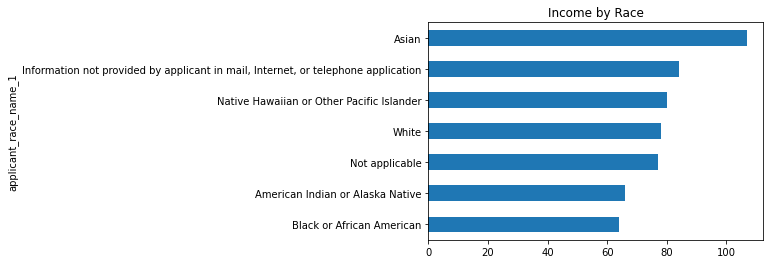

In [17]:
# Visualize applicant income by race
incomes_by_race = df_2017.groupby('applicant_race_name_1').median()['applicant_income_000s'].sort_values()
print(incomes_by_race)
incomes_by_race.plot(kind = 'barh',title = 'Income by Race')

applicant_ethnicity_name
Hispanic or Latino                                                                   65.0
Not applicable                                                                       77.0
Not Hispanic or Latino                                                               80.0
Information not provided by applicant in mail, Internet, or telephone application    84.0
Name: applicant_income_000s, dtype: float64


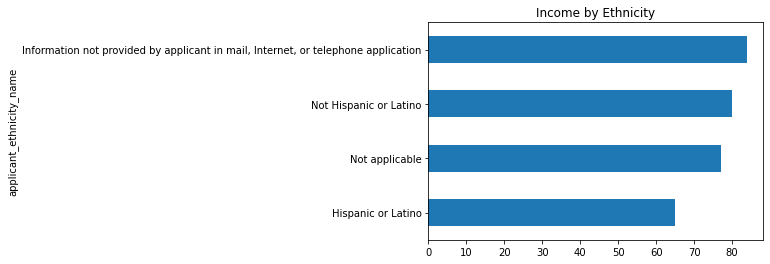

In [18]:
# Visualize applicant income by ethnicity
incomes_by_race = df_2017.groupby('applicant_ethnicity_name').median()['applicant_income_000s'].sort_values()
print(incomes_by_race)
incomes_by_race.plot(kind = 'barh',title = 'Income by Ethnicity')

Based on the figures above, it is clear that the lower income on average of African Americans and Hispanic individuals could be the reason for their higher denial rates. Despite this disparity being justified by formal equality of opportunity, it is clearly an overarching discrepancy that should lead to easier judgment under the ideals of fair equality of opportunity and luck egalitarianism. Under these measures of equality, marginalized groups should be compensated for starting in lower wealth families by having an easier time receiving credit. Even though the disparities may seem justified from differences in income, the reality is it is likely our data is underrepresenting the problem. Many lower income individuals do not even attempt to apply for loans since they are aware it is likely they will be denied. One example of this is the experience of an individual that stated “I found the idea of going to a bank completely intimidating and impossible [as] a divorced woman and a Black woman” (Miller). Many historically marginalized individuals know they are unlikely to be approved for a loan so they will not even bother applying for one, which is why the data is likely underrepresenting the disparity in loan rates. Overall, it is clear from our data that disparate impact to the historically marginalized population is still an issue in the credit industry, and even if it is a result of long-term effects of past discrimination it is still a problem that will likely require affirmative action to be reach fair equality of opportunity.

### Conclusion
Through thorough investigation of the HDMA data and a clear perspective through formal equality of opportunity, along with other parity measures, we can confidently conclude that our results follow Munnell, et al’s., paper. There is considerable evidence that in 2017, there is a disparate impact to the historically marginalized population in the credit industry based on loan denial rate, suggesting that little progress has been made in recent years to tackle this problem. 

As mentioned previously, our analysis is limited in that there are several factors that could lead to the loan denial that are not available within this data, and could also be the cause of the discrepancy. Examples of this could be access to education, discrimination within the labor market, intimidation in regards to moving into predominantly White neighborhoods, and more. However, these should all be addressed and taken into consideration to ensure that historically marginalized populations are treated equally and given fair access to these loans. Looking into the other structural factors and implementing new policies and protections is essential to striving towards positive change. 


### References

Consumer Financial Protection Bureau (CFPB). The Home Mortgage Disclosure Act: Download
    HMDA data. Retrieved from https://www.consumerfinance.gov/data-research/hmda/historic-data/. 
    
Ladd, Helen F. “Evidence on Discrimination in Mortgage Lending.” Journal of Economic
    Perspectives, vol. 12, no. 2, 1998, pp. 41–62., https://doi.org/10.1257/jep.12.2.41. 

Miller, Jennifer. “Is an Algorithm Less Racist than a Loan Officer?” The New York Times, The
    New York Times, 18 Sept. 2020, https://www.nytimes.com/2020/09/18/business/digital-mortgages.html. 
    
Munnell, Alicia, et al. (1992). Mortgage Lending in Boston: Interpreting HMDA Data. Federal
    Reserve Bank of Boston.
